In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [3]:
import time
import sys
sys.path.insert(0,'../..')
from gp2 import Runner

In [6]:
# load our lucchi augmented dataset with flipped and inverted images (2640 images and masks)
images_plus = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_lucchi_augmented_images_plus.npy')
masks_plus = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_lucchi_augmented_masks_plus.npy')

In [9]:
R1 = Runner(verbose=False)
R1.setup_data(images_plus, masks_plus, dataset_size=2640, weights=weights)

Weights OK!


In [10]:
RUNS = 10

In [11]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R1.run_classifier()
    R1.run_discriminator()
    l = R1.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R1.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Model saved to /tmp/tmpf7q9v2c2GP2/unet_0.model
History saved to /tmp/tmpf7q9v2c2GP2/history_0.pickle
Testing the classifier...
25/25 [==============================] - 3s 102ms/step - loss: -26.8356 - dice_coeff: 0.3644
Model saved to /tmp/tmpf7q9v2c2GP2/cnnd_0.model
History saved to /tmp/tmpf7q9v2c2GP2/cnnd_history_0.pickle
Testing the discriminator...
5/5 [==============================] - 0s 63ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 83 machine labels.
Replacing 27 from 83 !
D_relabeled_ 27
Removed: 27 Filled: 27
TOOK 885.0732610225677 seconds
***
RUN: 1
Model saved to /tmp/tmpf7q9v2c2GP2/unet_1.model
History saved to /tmp/tmpf7q9v2c2GP2/history_1.pickle
Testing the classifier...
25/25 [==============================] - 2s 96ms/step - loss: -23.9056 - dice_coeff: 0.3033
Testing the discriminator...
5/5 [==============================] - 0s 64ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 71 machine labels.
Replacing 23 from 71 !
D_relabeled_ 23
Removed: 2

In [12]:
R1.classifier_scores

[[-26.83564567565918, 0.36439651250839233],
 [-23.905635833740234, 0.30329427123069763],
 [-22.039430618286133, 0.3112960755825043],
 [171.9794464111328, 0.15129172801971436],
 [-171.2397003173828, 0.4262163043022156],
 [-195.77874755859375, 0.43237757682800293],
 [-196.82366943359375, 0.4317781925201416],
 [-210.41664123535156, 0.4277406632900238],
 [-216.37158203125, 0.42556649446487427],
 [-227.09780883789062, 0.358835905790329]]

In [13]:
R1.discriminator_scores

[[0.0, 1.0],
 [0.0, 1.0],
 [6.256052494049072, 0.949367105960846],
 [285.1885986328125, 0.5443037748336792],
 [0.0, 1.0],
 [0.0, 1.0],
 [5.009603500366211, 0.9556962251663208],
 [0.0011847002897411585, 1.0],
 [0.0, 1.0],
 [0.0, 1.0]]

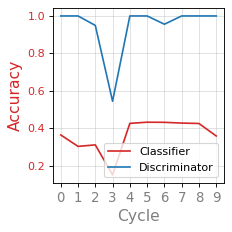

In [14]:
R1.plot()